In [1]:
# %matplotlib notebook

In [2]:
import pyforest
sys.path.append(str(Path.cwd().parent.absolute()))

In [3]:
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import preprocess_image, show_cam_on_image, scale_cam_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputSoftmaxTarget

In [4]:
from temp.resnet import ResNet18
from common.dataset import DogCat

In [5]:
def imshow(imgs):
    if not isinstance(imgs, list): imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        axs[0, i].imshow(img)
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [6]:
def make_grid(imgs, nrow=None):
    imgs = [TF.to_tensor(x) for x in imgs]
    nrow = int(np.ceil(np.sqrt(len(imgs)))) if nrow is None else nrow
    imgs = torchvision.utils.make_grid(imgs, nrow=nrow)
    imgs = TF.to_pil_image(imgs)
    return imgs

In [7]:
def calc_grad_cam(image, model, layer='layer4', label=None, use_cuda=True):
    device = 'cuda' if use_cuda else 'cpu'
    model = model.eval().to(device)

    image = TF.to_tensor(image.copy())
    minsz = min(image.shape[-2:])
    image = TF.to_pil_image(TF.center_crop(image, minsz))

    input_tensor = preprocess_image(
        TF.resize(image, 224),
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225)
    ).to(device)
    targets = None if label is None else [ClassifierOutputSoftmaxTarget(label)]

    gradcam = GradCAMPlusPlus(
        model=model,
        target_layers=[getattr(model, layer)[-1]],
        use_cuda=use_cuda
    )
    heatmap = gradcam(input_tensor=input_tensor, targets=targets)
#     heatmap = scale_cam_image(heatmap, (minsz,)*2)
    heatmap = heatmap[0]

    image = np.float32(image) / 255
    image = show_cam_on_image(img=image, mask=heatmap, use_rgb=True, image_weight=0.5)

    with torch.no_grad():
        pred = model(input_tensor)[0]
        pred = F.softmax(pred, dim=-1)
        pred = pred.cpu().numpy()

    return image, pred.argmax(), pred

In [8]:
write = False
trans = {'cat': 0, 'dog': 1}

imagd = Path('/data/dogcat/test1/9203.jpg')
model = ResNet18(num_classes=2, feat_dim=1024)
ckptd = Path('/projects/CWCL/ckpts/dogcat.bak')
image = Image.open(imagd)
label = None

In [9]:
index = [int(np.round(x)) for x in np.linspace(0, 120, 25)]
np.array(index)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120])

In [10]:
!rm -rf /projects/CWCL/temp/cams/**

In [11]:
image = T.Compose([
    T.Resize(224),
    T.CenterCrop(224)
])(image)
iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.0.jpg', image)

  0%|          | 0/25 [00:00<?, ?it/s]

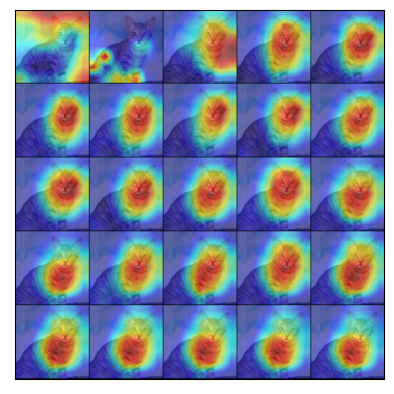

In [12]:
imgs = []
for i in tqdm(index):
    state = torch.load(ckptd/f'0_2022/epoch{i}.pkl')
    model.load_state_dict(state['model'])
    cam, pred_label, pred_softmax = calc_grad_cam(image, model, layer='layer4', label=label)
    if write:
        iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.0.{i}.jpg', cam)
    imgs.append(cam)
imshow(make_grid(imgs))

  0%|          | 0/25 [00:00<?, ?it/s]

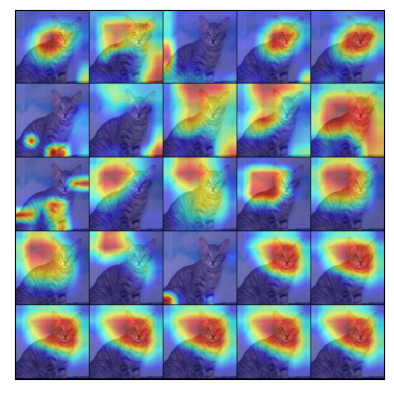

In [13]:
imgs = []
for i in tqdm(index):
    state = torch.load(ckptd/f'1_2022/epoch{i}.pkl')
    model.load_state_dict(state['model'])
    cam, pred_label, pred_softmax = calc_grad_cam(image, model, layer='layer4', label=label)
    if write:
        iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.1.{i}.jpg', cam)
    imgs.append(cam)
imshow(make_grid(imgs))

  0%|          | 0/25 [00:00<?, ?it/s]

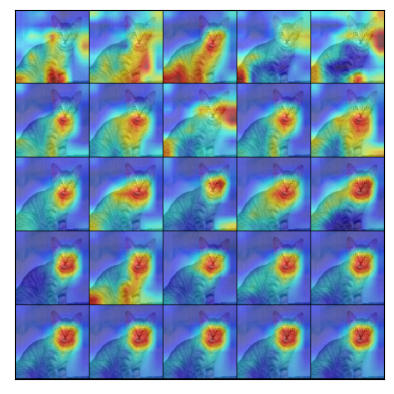

In [14]:
imgs = []
for i in tqdm(index):
    state = torch.load(ckptd/f'5_2022/epoch{i}.pkl')
    model.load_state_dict(state['model'])
    cam, pred_label, pred_softmax = calc_grad_cam(image, model, layer='layer4', label=label)
    if write:
        iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.5.{i}.jpg', cam)
    imgs.append(cam)
imshow(make_grid(imgs))

  0%|          | 0/25 [00:00<?, ?it/s]

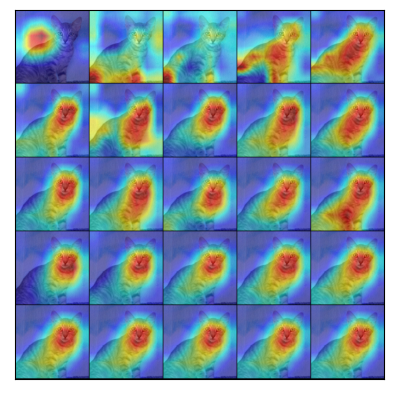

In [15]:
imgs = []
for i in tqdm(index):
    state = torch.load(ckptd/f'3_2022/epoch{i}.pkl')
    model.load_state_dict(state['model'])
    cam, pred_label, pred_softmax = calc_grad_cam(image, model, layer='layer4', label=label)
    if write:
        iio.imwrite(f'/projects/CWCL/temp/cams/{imagd.stem}.3.{i}.jpg', cam)
    imgs.append(cam)
imshow(make_grid(imgs))